In [4]:
from pathlib import Path
from typing import  List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [5]:
# CONSTANTS
SPLIT_DATA_FOLDER = Path().parent / 'split_data'
NORMAL_DATA = SPLIT_DATA_FOLDER / 'normal'
FAULT_DATA = SPLIT_DATA_FOLDER / 'fault'

In [6]:
def load_data(data_folder: Path) -> pd.DataFrame:
    li = []

    for filename in data_folder.glob('*.csv'):
        df = pd.read_csv(filename, names=['TIME', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
        li.append(df)

    frame = pd.concat(li, ignore_index=True)
    return frame

In [7]:
df_normal = load_data(data_folder=NORMAL_DATA)
df_fault = load_data(data_folder=FAULT_DATA)

In [8]:
def split_data_by_time(df: pd.DataFrame, time) -> pd.DataFrame:
    frame = df.loc[df['TIME'] == time]
    return frame

Data correlation (for every timestamp)

In [9]:
import math
def correlation_for_timestamps(df: pd.DataFrame):
    figure, axis = plt.subplots(8, 4, figsize=(40, 80))

    for ts in range(0, 31):
        data = split_data_by_time(df, ts+1)
        corr = data.corr()
        x = math.floor(ts / 4)
        y = ts - x * 4
        axis[x, y].set_title("Correlation for t=" + str(ts+1) + "min")
        sn.heatmap(corr, annot=True, ax=axis[x, y])

    plt.show()

Normal data correlation for every timestamp 

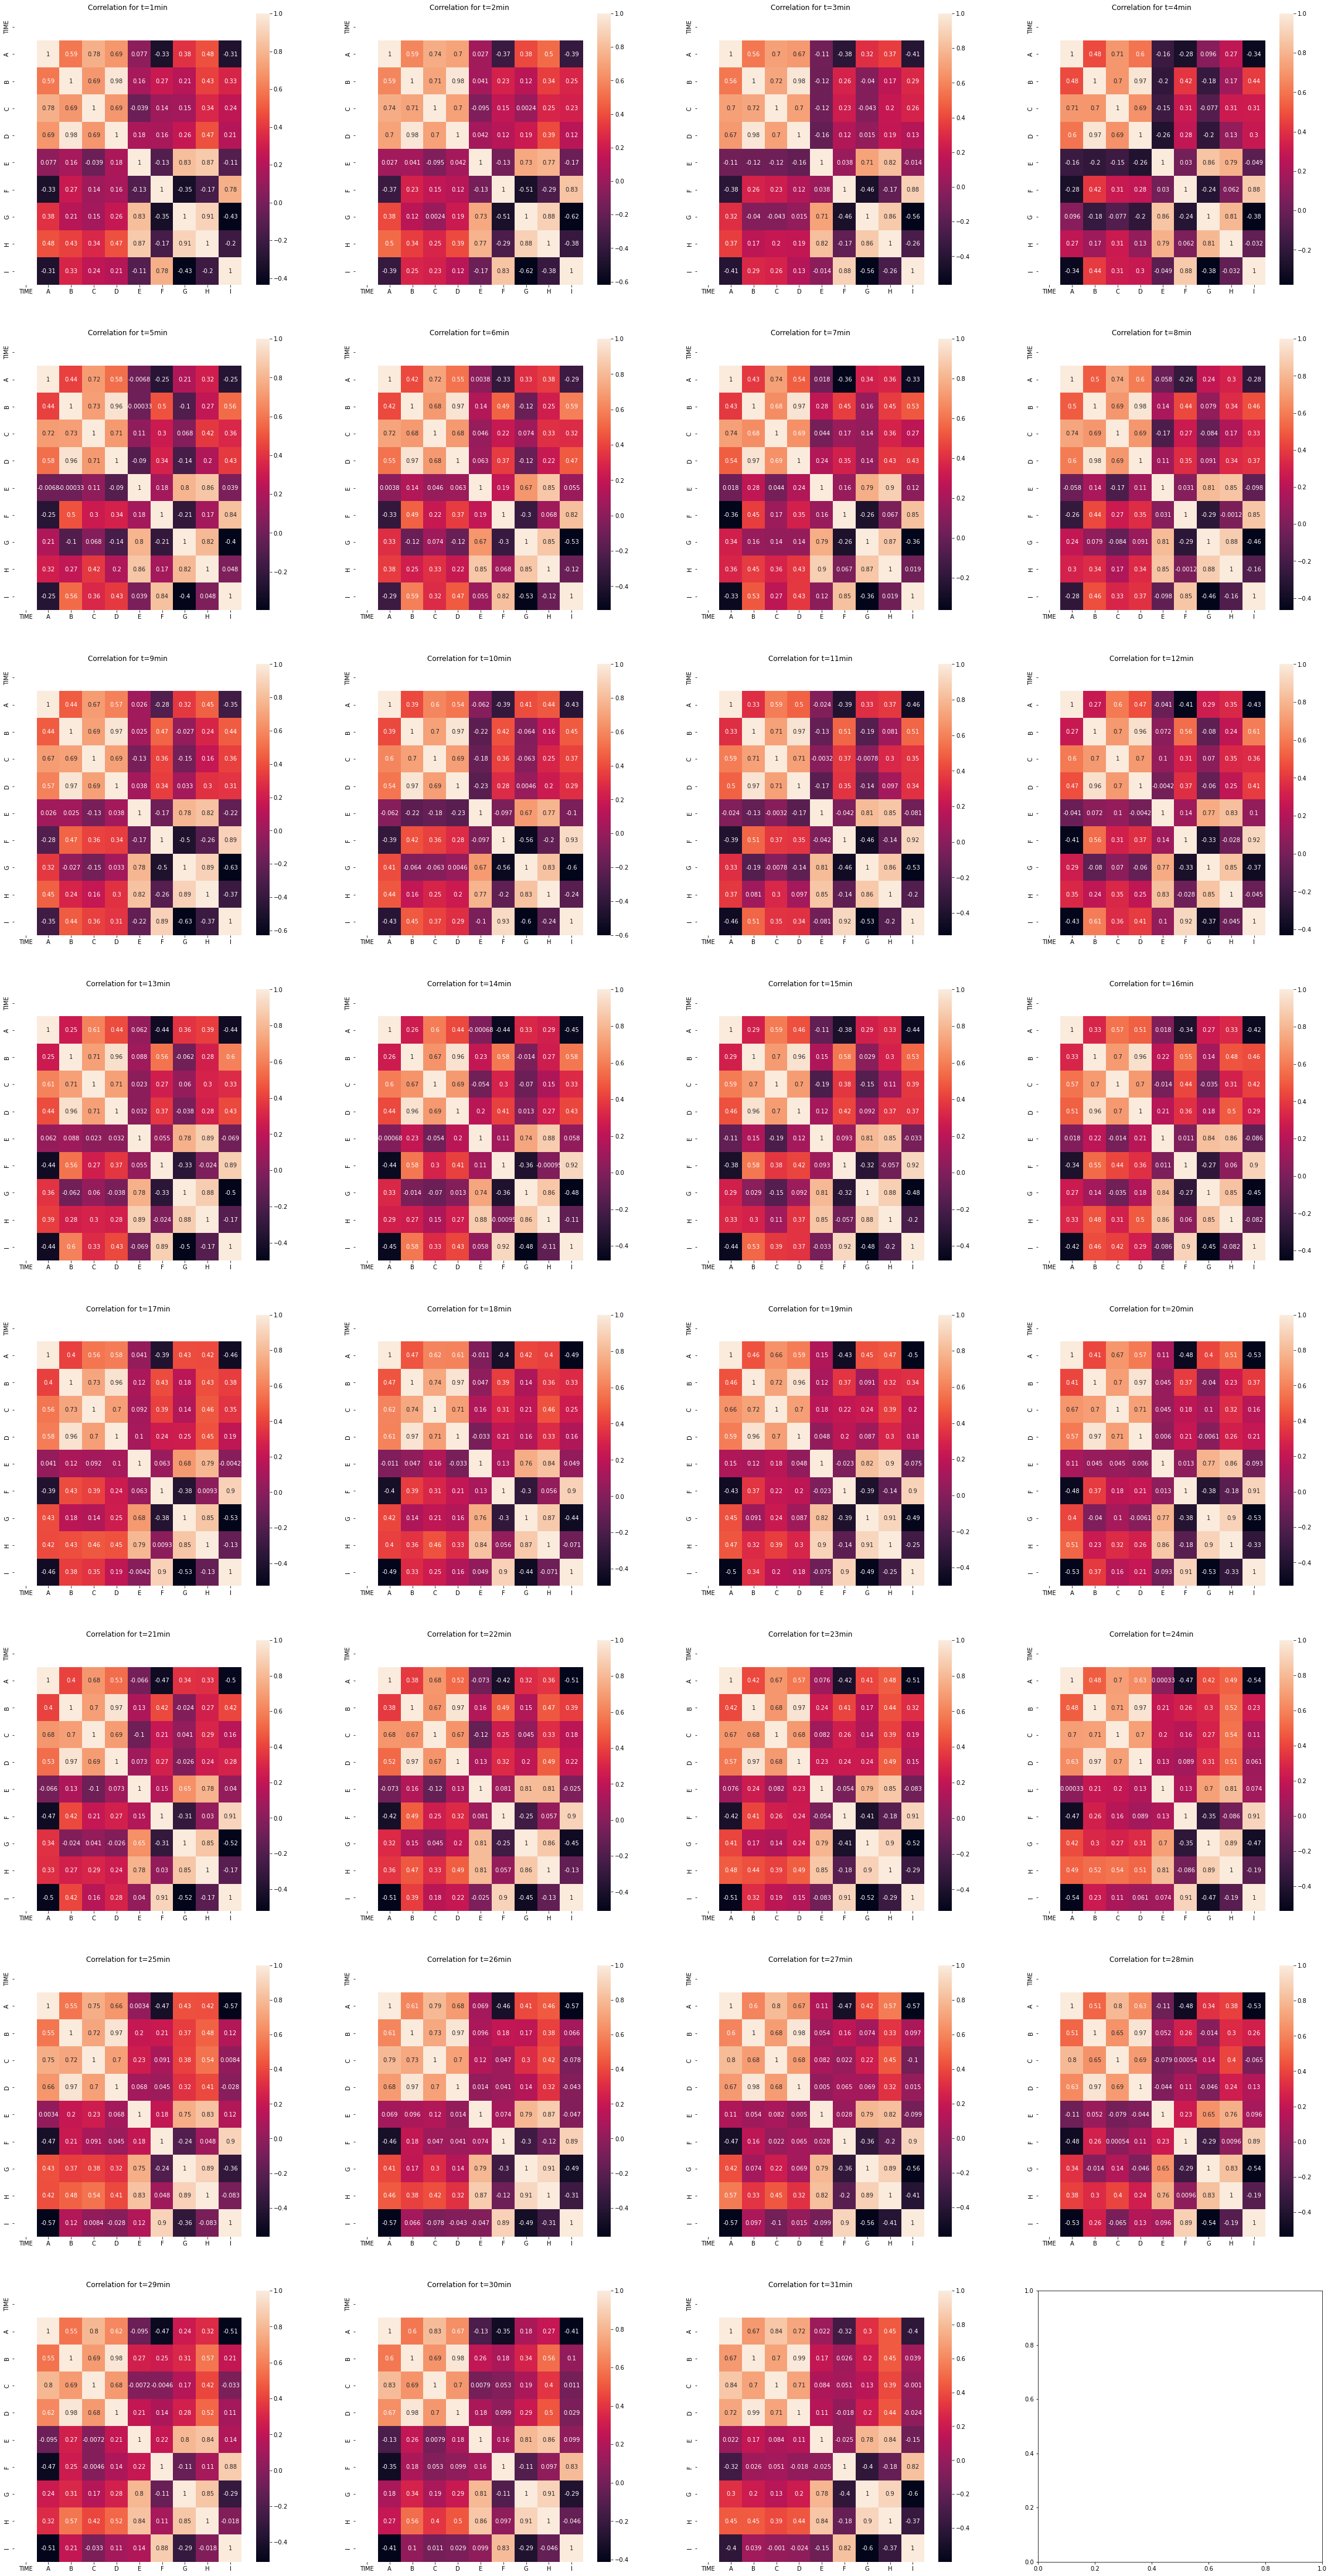

In [10]:
correlation_for_timestamps(df_normal)

Fault data correlation for every timestamp

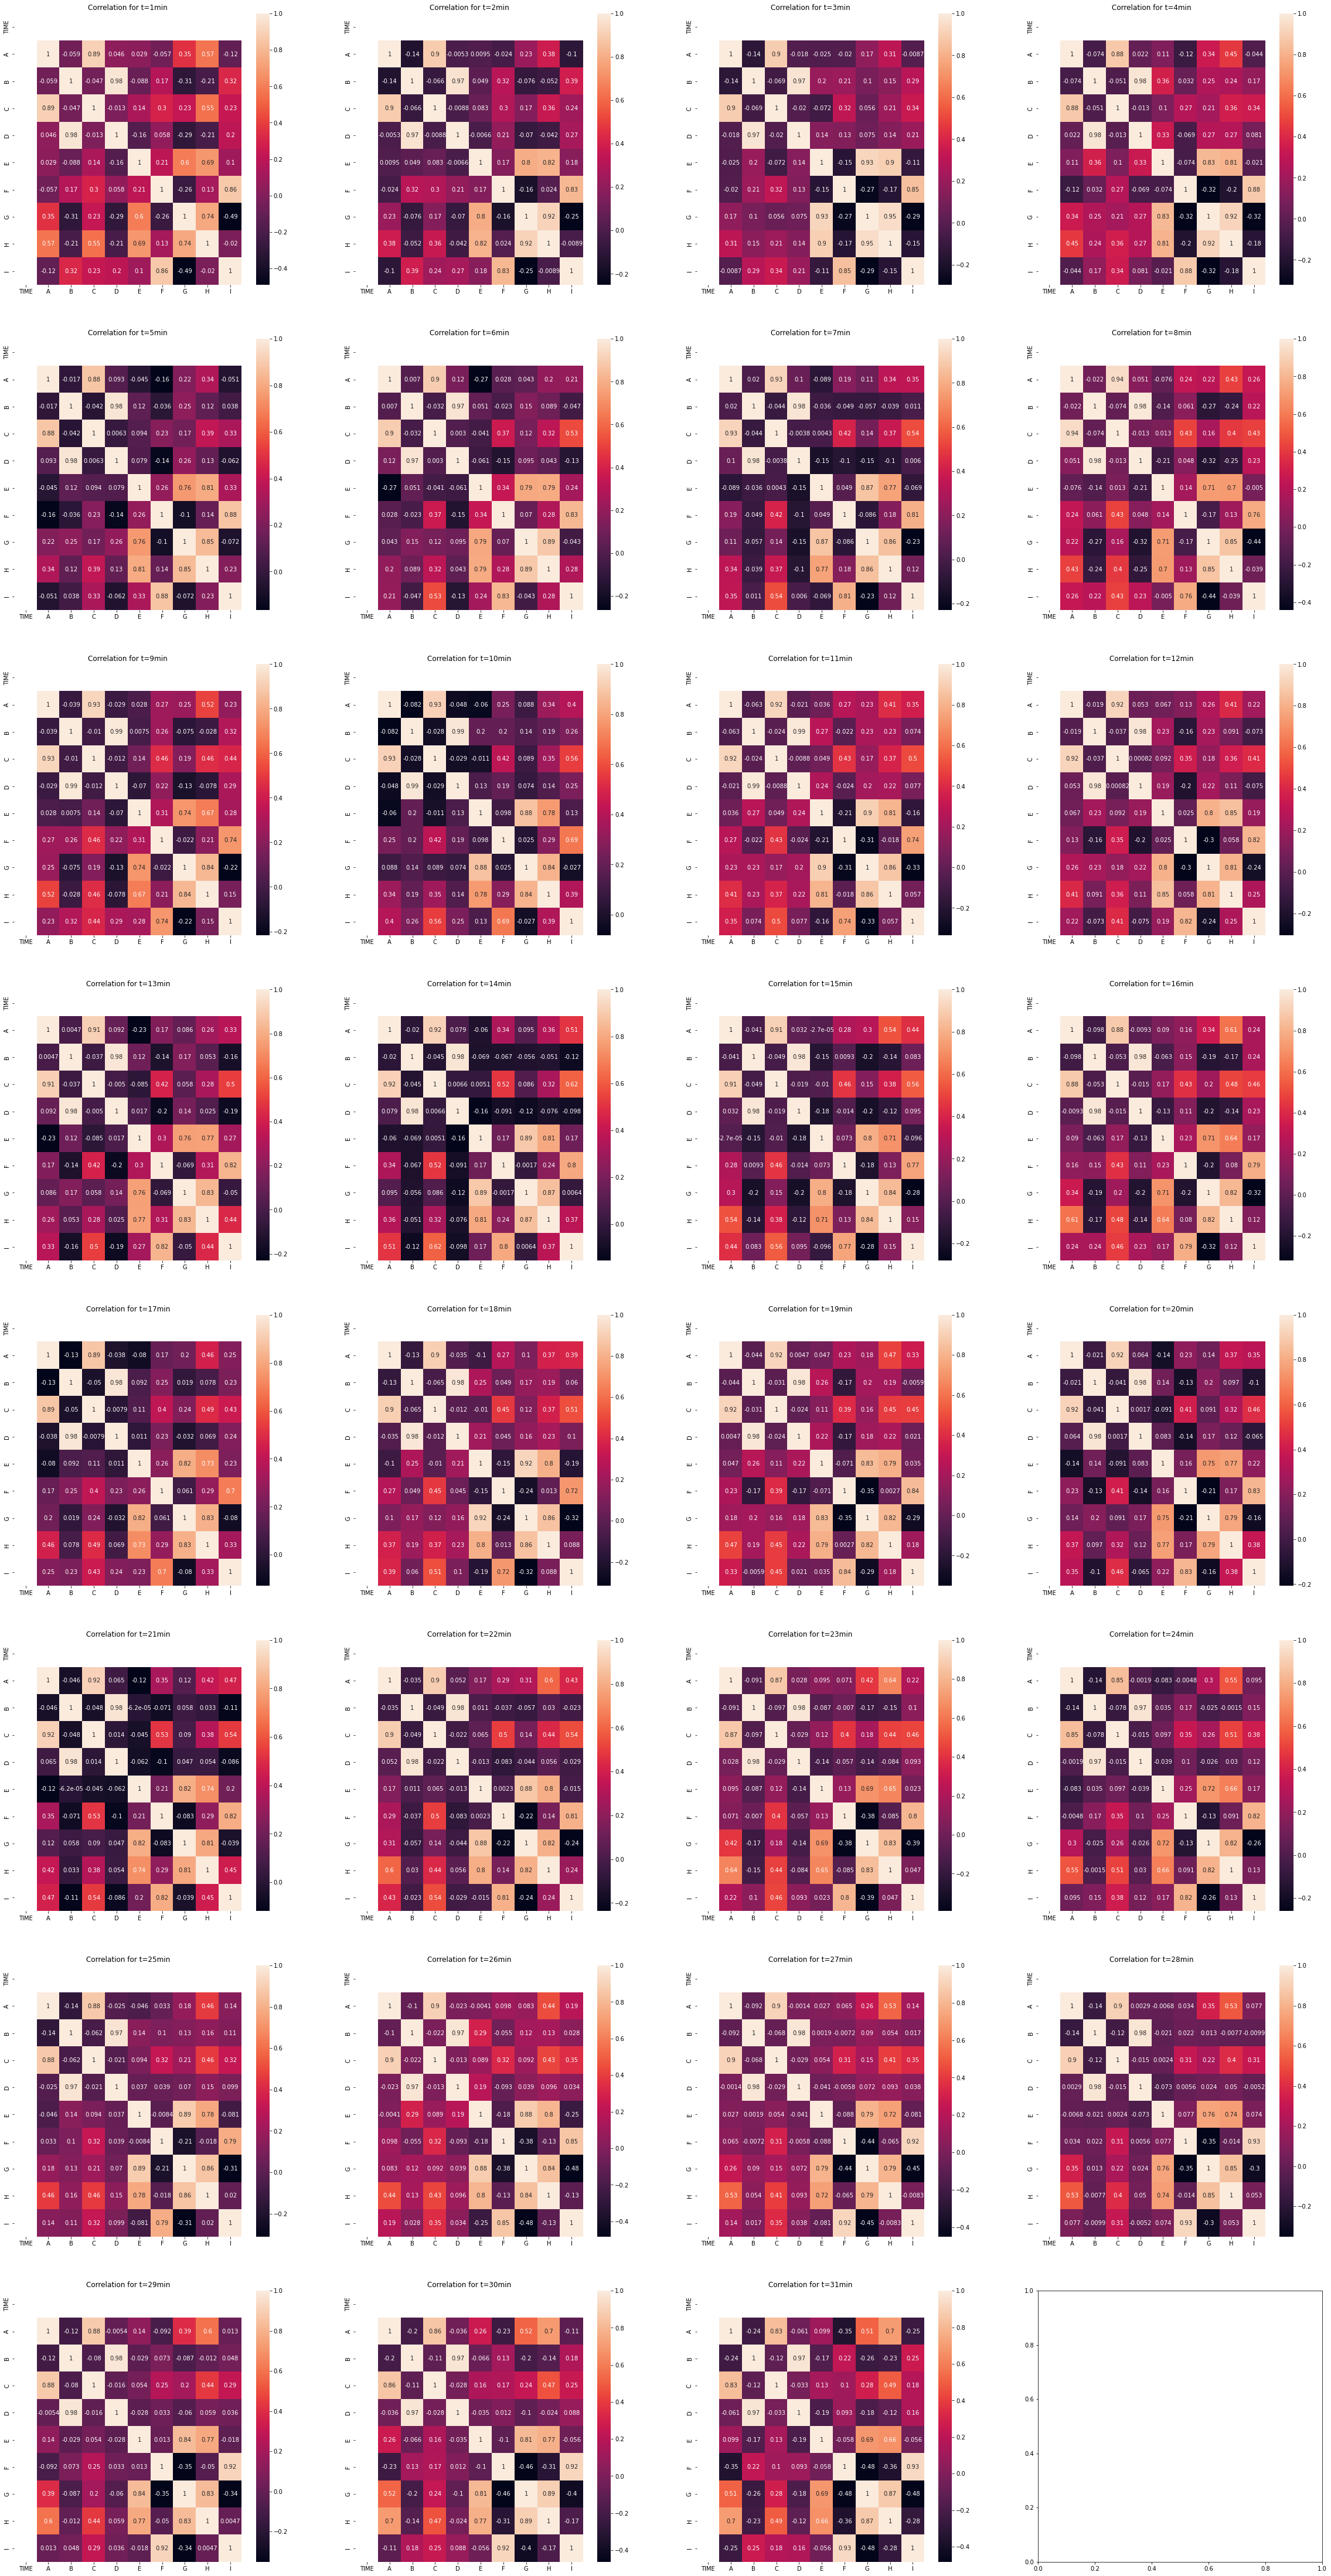

In [11]:
correlation_for_timestamps(df_fault)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


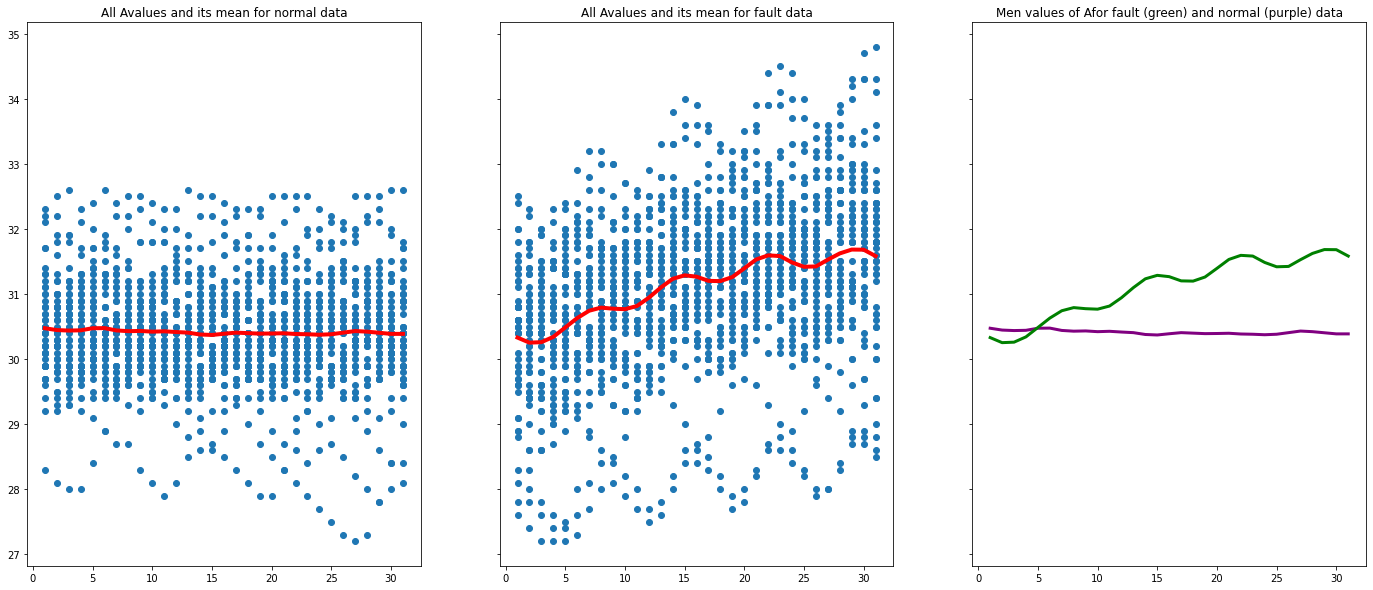

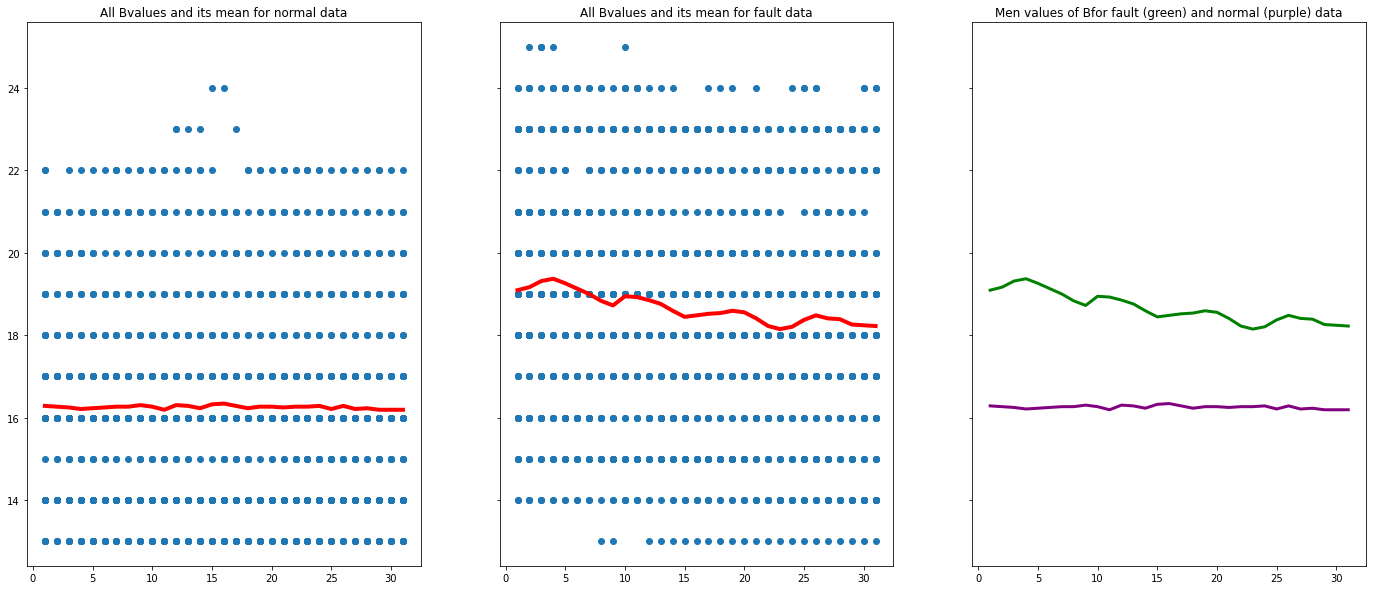

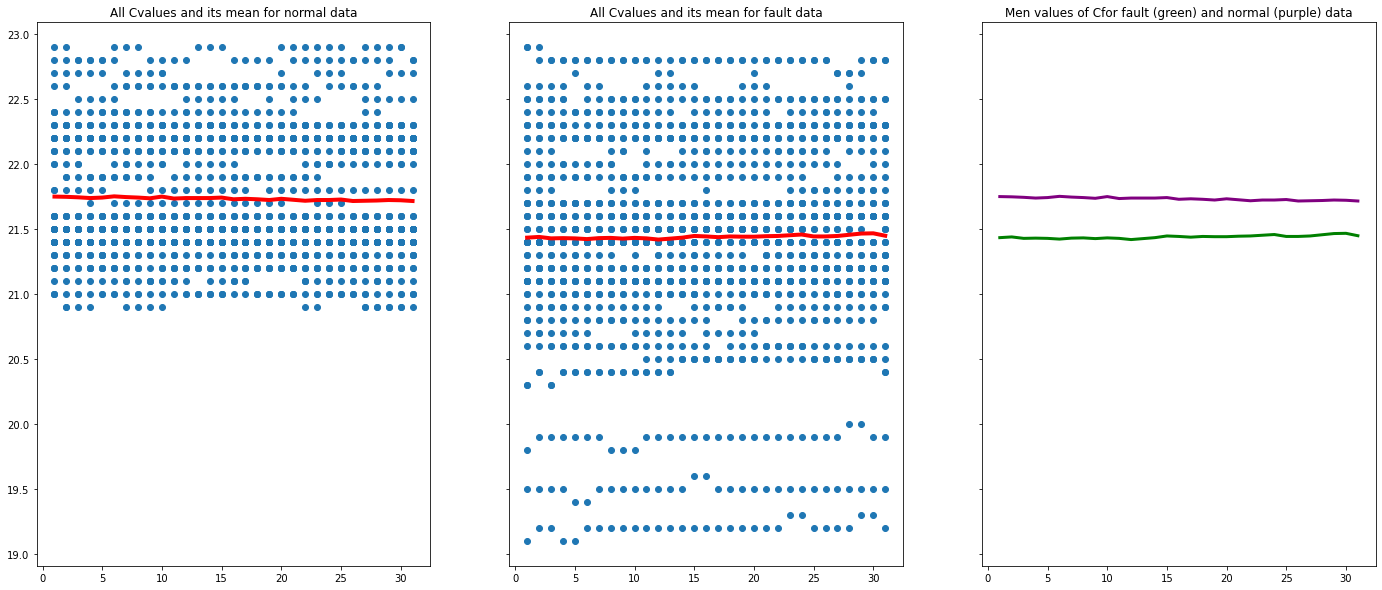

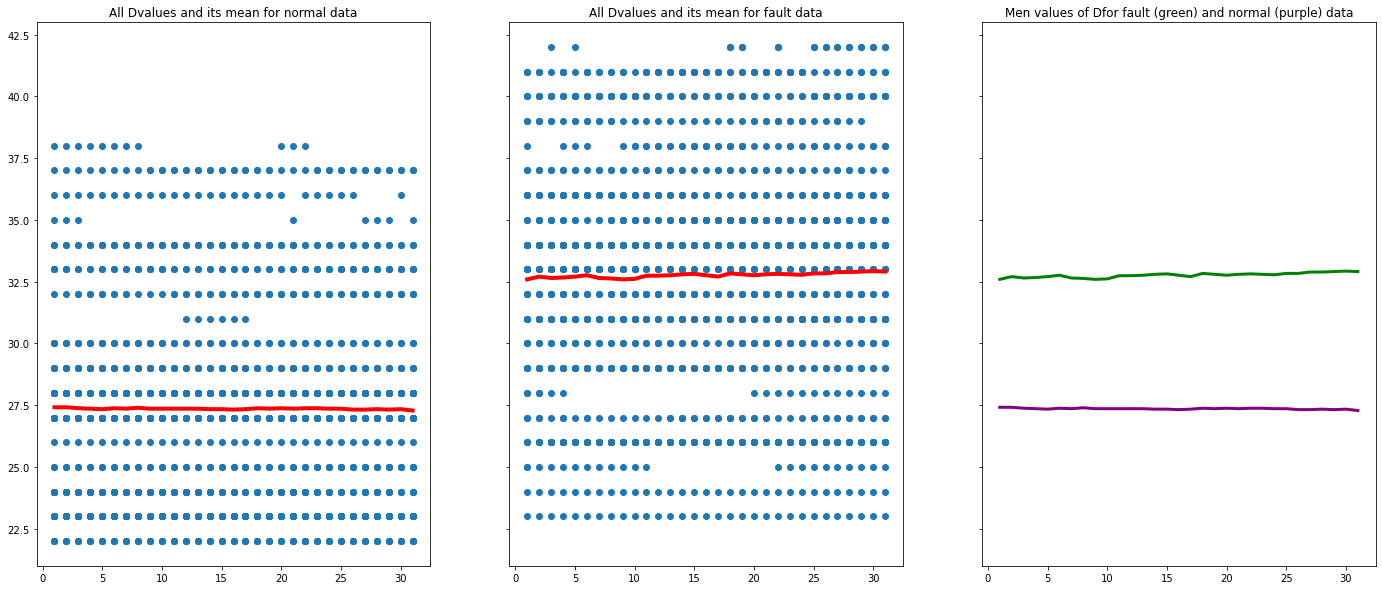

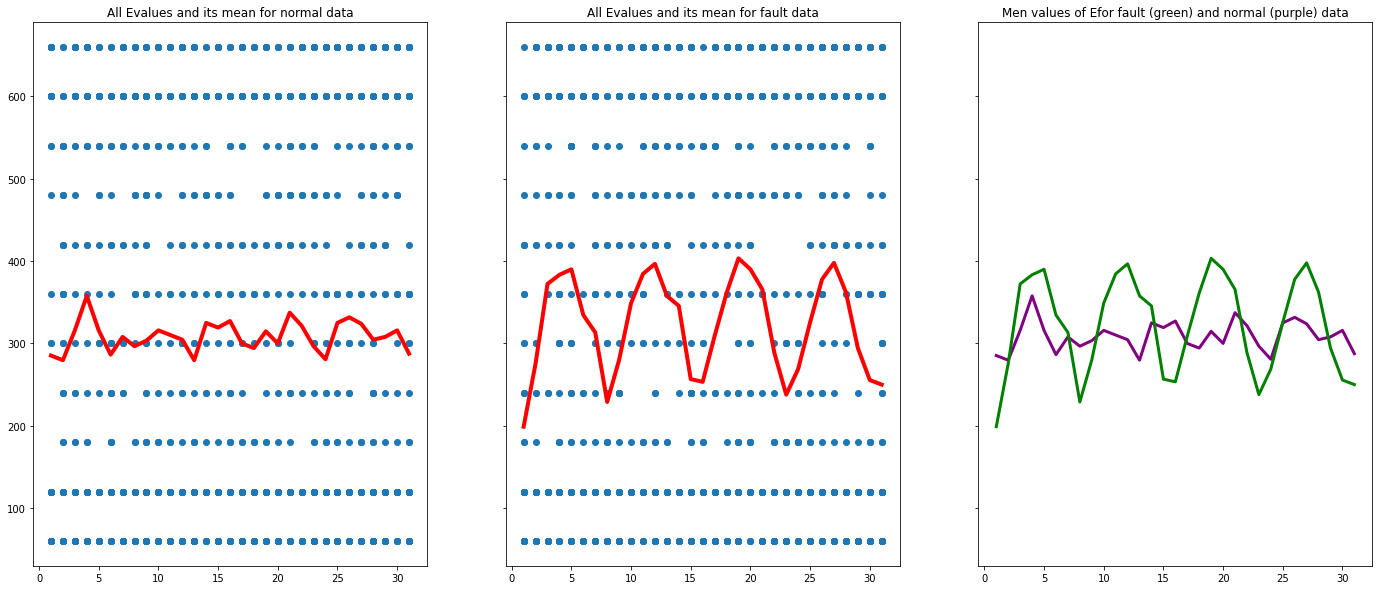

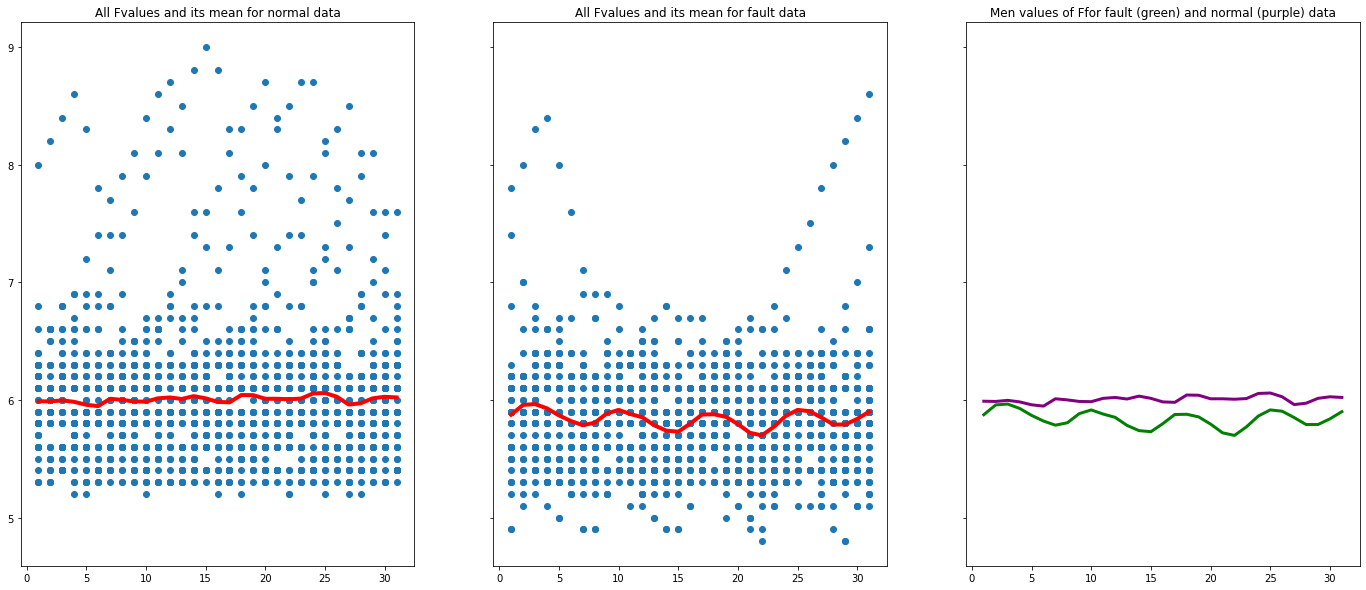

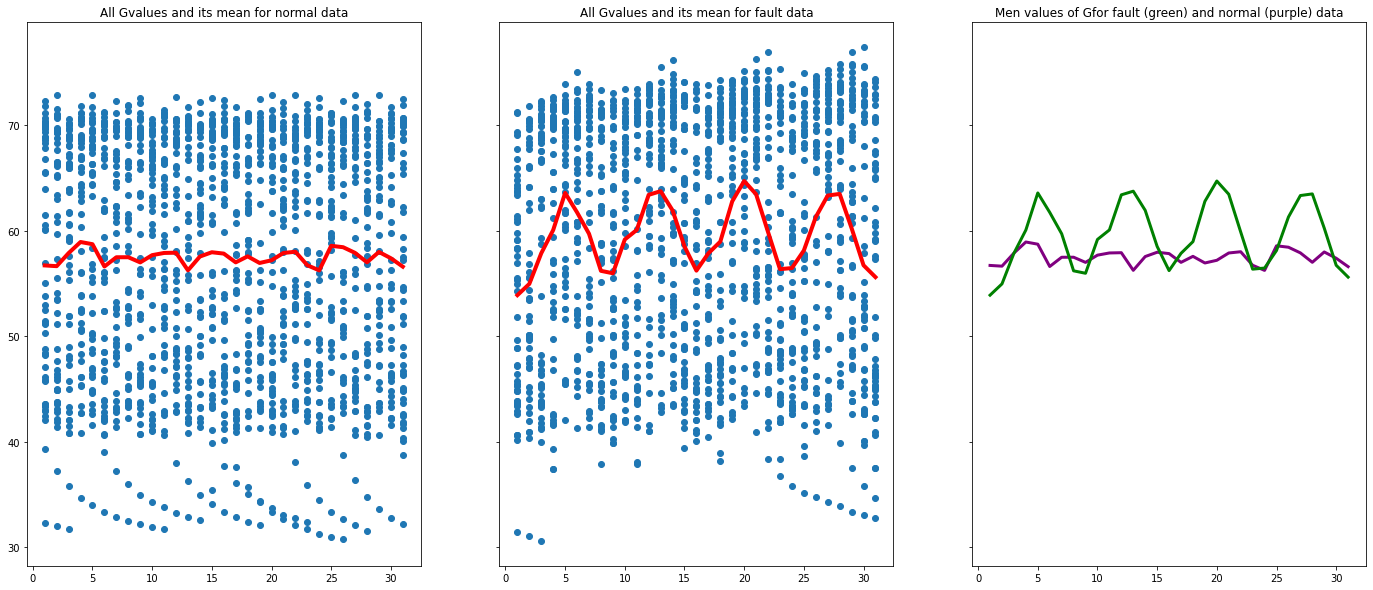

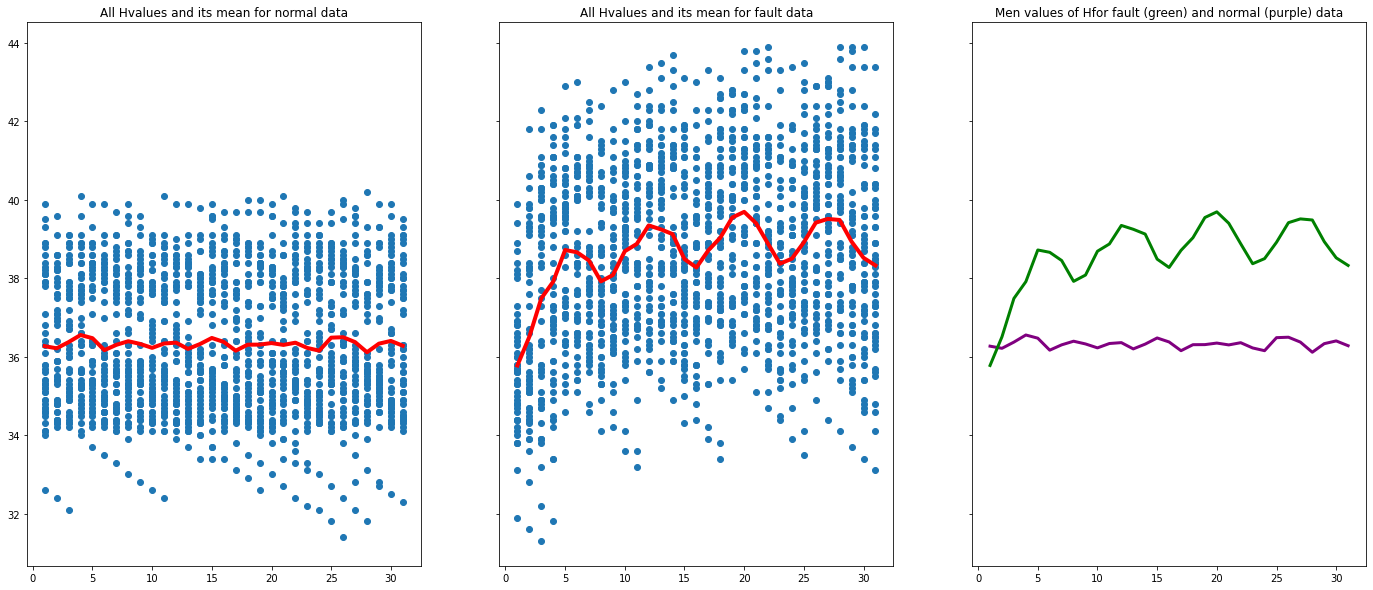

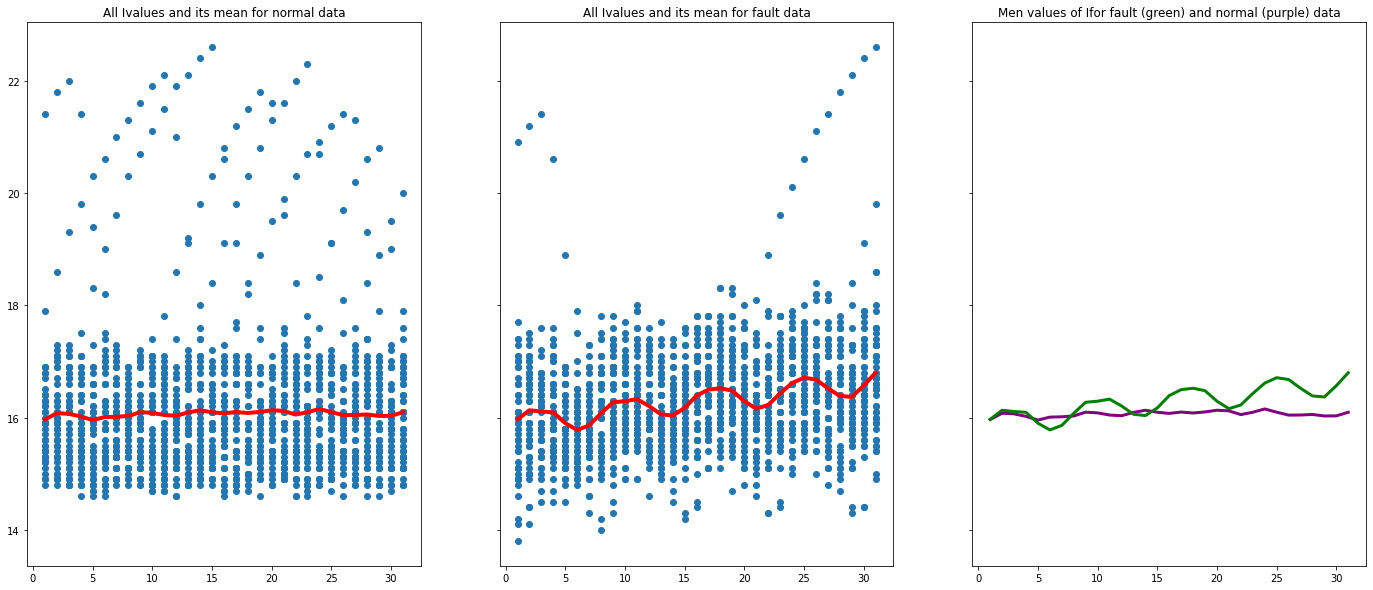

In [52]:
def display_means_and_points(ndf: pd.DataFrame, fdf: pd.DataFrame):
    labels = ['A','B','C', 'D', 'E', 'F', 'G', 'H', 'I']
    ndf_mean = ndf.groupby('TIME')['A','B','C', 'D', 'E', 'F', 'G', 'H', 'I'].mean()
    fdf_mean = fdf.groupby('TIME')['A','B','C', 'D', 'E', 'F', 'G', 'H', 'I'].mean()

    for index, param in enumerate(labels):
        figure, axis = plt.subplots(1, 3, figsize=(24, 10), sharex=True, sharey=True)
        axis[0].set_title("All " + param + "values and its mean for normal data")
        axis[0].scatter(ndf.iloc[:,0], ndf.iloc[:,index+1], marker='o')
        axis[0].plot(ndf_mean.index, ndf_mean[param], linewidth=4, color='red')
        axis[1].set_title("All " + param + "values and its mean for fault data")
        axis[1].scatter(fdf.iloc[:,0], fdf.iloc[:,index+1], marker='o')
        axis[1].plot(fdf_mean.index, fdf_mean[param], linewidth=4, color='red')
        axis[2].set_title("Men values of " + param + "for fault (green) and normal (purple) data")
        axis[2].plot(ndf_mean.index, ndf_mean[param], linewidth=3, color='purple')
        axis[2].plot(fdf_mean.index, fdf_mean[param], linewidth=3, color='green')

display_means_and_points(df_normal, df_fault)
